# Regression Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
pd.options.display.float_format = '{:.4f}'.format
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
pd.set_option("display.max_rows", None, "display.max_columns", None)
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
df_regression_original = pd.read_csv('regression.csv')

In [3]:
df_regression = df_regression_original.drop(['flat_model','town', 'block', 'street_name', 'storey_range', 'floor_area_sqm'
                   ,'lease_commence_date', 'resale_price', 'complete_address', 'Lat', 'Long'], axis = 1)

In [4]:
df_regression['month'] = pd.to_datetime(df_regression['month'])
df_regression.set_index('month', inplace = True)

In [5]:
df_regression.dtypes

Unnamed: 0               int64
flat_type                int64
remaining_lease        float64
dist_nearest_train     float64
dist_nearest_prisch    float64
dist_nearest_secsch    float64
dist_nearest_mall      float64
storey_10_18             int64
storey_19_27             int64
storey_1_9               int64
price_psm              float64
num_train                int64
num_prisch               int64
num_secsch               int64
num_mall                 int64
train_station_ismrt      int64
dtype: object

# Data Visualisation

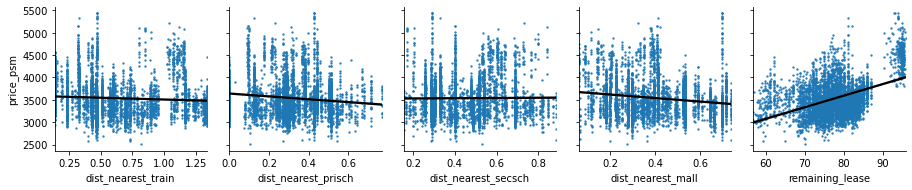

In [6]:
sns.pairplot(df_regression, x_vars = ['dist_nearest_train','dist_nearest_prisch','dist_nearest_secsch','dist_nearest_mall', 'remaining_lease'],
             y_vars = ['price_psm'],
             kind="reg",plot_kws=dict(scatter_kws=dict(s=2), line_kws = {'color':'black'}))

## Insight

No obvious quadratic or logarithmic relationship that we can take into account

In [7]:
# Splitting dataset into dependent (y) and independent variables (x)
df_regression_x = df_regression.loc[:, 'flat_type':'train_station_ismrt']
df_regression_y = df_regression.iloc[:, -6]
df_regression_x = df_regression_x.drop(['price_psm'], axis = 1)

In [8]:
lr_model = LinearRegression()

In [9]:
# Include all variables

kfold_scores = cross_val_score(lr_model, df_regression_x, df_regression_y, cv=10)
print(kfold_scores.mean())
print(kfold_scores)

0.25801644314015487
[0.01270354 0.03066461 0.13338945 0.15629813 0.30996844 0.20013698
 0.395922   0.42193099 0.47572738 0.44342292]


In [10]:
import statsmodels.api as sm
ols_model = sm.OLS(df_regression_y.astype(float), df_regression_x.astype(float)).fit()

In [11]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_psm   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     216.7
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:30:41   Log-Likelihood:                -36291.
No. Observations:                5025   AIC:                         7.261e+04
Df Residuals:                    5011   BIC:                         7.270e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
flat_type              -8.9685      6.129     -1.463      0.143     -20.984       3.047
remaining_lease        33.7461      0.917     36.784      0.000      31.948      35.545
dist_nearest_train   -346.8491     24.439    -14.192      0.000    -394.760    -298.938
dist_nearest_prisch  -209.4413     40.643     -5.153      0.000    -289.120    -129.763
dist_nearest_secsch   -64.6679     41.048     -1.575      0.115    -145.140      15.804
dist_nearest_mall    -830.9986     36.896    -22.523      0.000    -903.330    -758.667
storey_10_18         1823.0294     85.759     21.258      0.000    1654.904    1991.155
storey_19_27         1842.1719     91.730     20.083      0.000    1662.342    2022.002
storey_1_9           1663.6993     84.743     19.632      0.000    1497.566    1829.833
num_train               3.7790      6.574      0.575      0.565      -9.109      16.667
num_prisch            -36.2997      9.824     -3.695      0.000     -55.560     -17.040
num_secsch             83.4407     12.681      6.580      0.000      58.580     108.301
num_mall              -96.1602     18.501     -5.198      0.000    -132.429     -59.891
train_station_ismrt  -136.9804     20.984     -6.528      0.000    -178.118     -95.843
==============================================================================
Omnibus:                      420.504   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              566.302
Skew:                           0.706   Prob(JB):                    1.07e-123
Kurtosis:                       3.844   Cond. No.                     2.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Only flat type
# Splitting dataset into dependent (y) and independent variables (x)
df_regression_x = df_regression.iloc[:, 1:2]
df_regression_y = df_regression.iloc[:, -6]

kfold_scores = cross_val_score(lr_model, df_regression_x, df_regression_y, cv=10)
print(kfold_scores.mean())
print(kfold_scores)

-0.040975212354776656
[-0.09620682 -0.01047828 -0.02956018 -0.02453684  0.01174804 -0.07207366
 -0.02013085 -0.03107583 -0.00733116 -0.13010656]


In [13]:
import statsmodels.api as sm
ols_model = sm.OLS(df_regression_y.astype(float), df_regression_x.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_psm   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                          1.041e+05
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:30:42   Log-Likelihood:                         -40491.
No. Observations:                5025   AIC:                                  8.098e+04
Df Residuals:                    5024   BIC:                                  8.099e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
flat_type    762.3229      2.362    322.697      0.000     757.692     766.954
==============================================================================
Omnibus:                      917.324   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2164.720
Skew:                           1.027   Prob(JB):                         0.00
Kurtosis:                       5.474   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Only flat type and remaining lease
# Splitting dataset into dependent (y) and independent variables (x)
df_regression_x = df_regression.iloc[:, 1:3]
df_regression_y = df_regression.iloc[:, -6]

kfold_scores = cross_val_score(lr_model, df_regression_x, df_regression_y, cv=10)
print(kfold_scores.mean())
print(kfold_scores)

0.09402446418139435
[-0.14211041 -0.11645129 -0.05394477 -0.04197852  0.193516    0.06668805
  0.19918248  0.21474622  0.2735492   0.34704767]


In [15]:
import statsmodels.api as sm
ols_model = sm.OLS(df_regression_y.astype(float), df_regression_x.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_psm   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          2.031e+05
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:30:42   Log-Likelihood:                         -37157.
No. Observations:                5025   AIC:                                  7.432e+04
Df Residuals:                    5023   BIC:                                  7.433e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
flat_type          48.6002      6.173      7.873      0.000      36.498      60.702
remaining_lease    42.5080      0.360    117.931      0.000      41.801      43.215
==============================================================================
Omnibus:                      395.982   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.086
Skew:                           0.729   Prob(JB):                    1.89e-108
Kurtosis:                       3.491   Cond. No.                         87.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Only flat type, remaining lease, dist to train station
# Splitting dataset into dependent (y) and independent variables (x)
df_regression_x = df_regression.iloc[:, 1:4]
df_regression_y = df_regression.iloc[:, -6]

kfold_scores = cross_val_score(lr_model, df_regression_x, df_regression_y, cv=10)
print(kfold_scores.mean())
print(kfold_scores)

0.11625481438393041
[-0.07482772 -0.0506654   0.01755232 -0.01254545  0.20139906  0.05013442
  0.21851045  0.22956268  0.30404892  0.27937886]


In [17]:
import statsmodels.api as sm
ols_model = sm.OLS(df_regression_y.astype(float), df_regression_x.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_psm   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.375e+05
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:30:42   Log-Likelihood:                         -37119.
No. Observations:                5025   AIC:                                  7.424e+04
Df Residuals:                    5022   BIC:                                  7.426e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
flat_type             44.7054      6.143      7.278      0.000      32.663      56.748
remaining_lease       43.9093      0.392    112.124      0.000      43.142      44.677
dist_nearest_train  -149.6176     17.010     -8.796      0.000    -182.965    -116.270
==============================================================================
Omnibus:                      366.512   Durbin-Watson:                   1.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              451.846
Skew:                           0.697   Prob(JB):                     7.64e-99
Kurtosis:                       3.463   Cond. No.                         242.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Only flat type, remaining lease, dist to train station, dist to pri sch
# Splitting dataset into dependent (y) and independent variables (x)
df_regression_x = df_regression.iloc[:, 1:5]
df_regression_y = df_regression.iloc[:, -6]

kfold_scores = cross_val_score(lr_model, df_regression_x, df_regression_y, cv=10)
print(kfold_scores.mean())
print(kfold_scores)

0.11621676151022209
[-0.07532983 -0.05906056  0.01746295 -0.01075263  0.19794636  0.05344096
  0.22053799  0.23200201  0.30679567  0.27912469]


In [19]:
import statsmodels.api as sm
ols_model = sm.OLS(df_regression_y.astype(float), df_regression_x.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_psm   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.039e+05
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:30:42   Log-Likelihood:                         -37101.
No. Observations:                5025   AIC:                                  7.421e+04
Df Residuals:                    5021   BIC:                                  7.424e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
flat_type              41.4260      6.145      6.741      0.000      29.378      53.474
remaining_lease        43.3819      0.400    108.479      0.000      42.598      44.166
dist_nearest_train   -171.6443     17.340     -9.899      0.000    -205.637    -137.651
dist_nearest_prisch   218.9301     36.288      6.033      0.000     147.790     290.070
==============================================================================
Omnibus:                      332.804   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              401.631
Skew:                           0.664   Prob(JB):                     6.12e-88
Kurtosis:                       3.392   Cond. No.                         521.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Only flat type, remaining lease, dist to train station, dist to pri sch, dist to sec sch
# Splitting dataset into dependent (y) and independent variables (x)
df_regression_x = df_regression.iloc[:, 1:6]
df_regression_y = df_regression.iloc[:, -6]

kfold_scores = cross_val_score(lr_model, df_regression_x, df_regression_y, cv=10)
print(kfold_scores.mean())
print(kfold_scores)

0.11547976992331652
[-0.07651736 -0.05588683  0.01669167 -0.01766344  0.20152924  0.05582999
  0.22235962  0.23539767  0.30808306  0.26497408]


In [21]:
import statsmodels.api as sm
ols_model = sm.OLS(df_regression_y.astype(float), df_regression_x.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_psm   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          8.314e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:30:43   Log-Likelihood:                         -37099.
No. Observations:                5025   AIC:                                  7.421e+04
Df Residuals:                    5020   BIC:                                  7.424e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
flat_type              40.5686      6.160      6.586      0.000      28.492      52.645
remaining_lease        43.0367      0.439     98.086      0.000      42.177      43.897
dist_nearest_train   -183.8883     18.483     -9.949      0.000    -220.122    -147.654
dist_nearest_prisch   229.9626     36.735      6.260      0.000     157.945     301.980
dist_nearest_secsch    73.4174     38.443      1.910      0.056      -1.947     148.782
==============================================================================
Omnibus:                      332.319   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              401.278
Skew:                           0.662   Prob(JB):                     7.31e-88
Kurtosis:                       3.405   Cond. No.                         590.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Only flat type, remaining lease, dist to train station, dist to pri sch, dist to sec sch, dist to mall
# Splitting dataset into dependent (y) and independent variables (x)
df_regression_x = df_regression.iloc[:, 1:7]
df_regression_y = df_regression.iloc[:, -6]

kfold_scores = cross_val_score(lr_model, df_regression_x, df_regression_y, cv=10)
print(kfold_scores.mean())
print(kfold_scores)

0.1988862329353283
[-0.00520607 -0.04074046  0.05513222  0.09581869  0.2766604   0.1807033
  0.32633615  0.32947615  0.37748835  0.39319358]


In [23]:
import statsmodels.api as sm
ols_model = sm.OLS(df_regression_y.astype(float), df_regression_x.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_psm   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          7.679e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:30:43   Log-Likelihood:                         -36843.
No. Observations:                5025   AIC:                                  7.370e+04
Df Residuals:                    5019   BIC:                                  7.374e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
flat_type              63.5693      5.938     10.705      0.000      51.928      75.210
remaining_lease        46.8746      0.449    104.487      0.000      45.995      47.754
dist_nearest_train   -310.4467     18.394    -16.878      0.000    -346.506    -274.387
dist_nearest_prisch   321.8566     35.138      9.160      0.000     252.971     390.742
dist_nearest_secsch     4.9182     36.656      0.134      0.893     -66.944      76.780
dist_nearest_mall    -792.8587     34.170    -23.203      0.000    -859.848    -725.870
==============================================================================
Omnibus:                      417.727   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.254
Skew:                           0.717   Prob(JB):                    5.38e-120
Kurtosis:                       3.752   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Only flat type, remaining lease, dist to train station, dist to pri sch, dist to sec sch, dist to mall, storeys
# Splitting dataset into dependent (y) and independent variables (x)
df_regression_x = df_regression.iloc[:, 1:10]
df_regression_y = df_regression.iloc[:, -6]

kfold_scores = cross_val_score(lr_model, df_regression_x, df_regression_y, cv=10)
print(kfold_scores.mean())
print(kfold_scores)

0.2350726906599256
[0.04924164 0.01703739 0.10667483 0.15913679 0.29392737 0.18863009
 0.35518796 0.36092395 0.43185456 0.38811231]


In [25]:
import statsmodels.api as sm
ols_model = sm.OLS(df_regression_y.astype(float), df_regression_x.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_psm   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     308.4
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:30:43   Log-Likelihood:                -36407.
No. Observations:                5025   AIC:                         7.283e+04
Df Residuals:                    5016   BIC:                         7.289e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
flat_type             -13.3027      6.129     -2.171      0.030     -25.318      -1.288
remaining_lease        29.8471      0.729     40.930      0.000      28.417      31.277
dist_nearest_train   -284.4387     16.993    -16.738      0.000    -317.753    -251.125
dist_nearest_prisch   -35.2711     34.549     -1.021      0.307    -103.003      32.461
dist_nearest_secsch  -160.2780     34.101     -4.700      0.000    -227.130     -93.426
dist_nearest_mall    -789.0816     31.407    -25.124      0.000    -850.653    -727.510
storey_10_18         1955.8743     66.444     29.437      0.000    1825.615    2086.133
storey_19_27         1956.8287     74.320     26.330      0.000    1811.129    2102.529
storey_1_9           1797.8135     64.975     27.669      0.000    1670.435    1925.192
==============================================================================
Omnibus:                      469.482   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              642.071
Skew:                           0.762   Prob(JB):                    3.77e-140
Kurtosis:                       3.861   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Only flat type, remaining lease, dist to train station, dist to pri sch, dist to sec sch, dist to mall, num of train stations
# Splitting dataset into dependent (y) and independent variables (x)
df_regression_x = df_regression.iloc[:, 1:12]
df_regression_y = df_regression.iloc[:, -6]
df_regression_x = df_regression_x.drop(['price_psm', 'storey_10_18', 'storey_19_27', 'storey_1_9'], axis = 1)

kfold_scores = cross_val_score(lr_model, df_regression_x, df_regression_y, cv=10)
print(kfold_scores.mean())
print(kfold_scores)

0.19779192692432232
[-0.00983593 -0.04469505  0.05611811  0.09344473  0.27372685  0.1808358
  0.32698605  0.32976723  0.37803867  0.39353281]


In [27]:
import statsmodels.api as sm
ols_model = sm.OLS(df_regression_y.astype(float), df_regression_x.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_psm   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          6.683e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:30:43   Log-Likelihood:                         -36805.
No. Observations:                5025   AIC:                                  7.362e+04
Df Residuals:                    5018   BIC:                                  7.367e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
flat_type              60.9770      5.901     10.333      0.000      49.408      72.546
remaining_lease        46.4232      0.448    103.571      0.000      45.545      47.302
dist_nearest_train   -279.5326     18.593    -15.034      0.000    -315.983    -243.082
dist_nearest_prisch   352.3297     35.048     10.053      0.000     283.620     421.039
dist_nearest_secsch    29.2245     36.487      0.801      0.423     -42.307     100.756
dist_nearest_mall    -922.8141     37.011    -24.934      0.000    -995.371    -850.257
num_train              29.9888      3.419      8.770      0.000      23.285      36.692
==============================================================================
Omnibus:                      473.956   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              651.351
Skew:                           0.765   Prob(JB):                    3.64e-142
Kurtosis:                       3.877   Cond. No.                         604.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Only flat type, remaining lease, dist to train station, dist to pri sch, dist to sec sch, dist to mall, num of train stations, num of pri sch
# Splitting dataset into dependent (y) and independent variables (x)
df_regression_x = df_regression.iloc[:, 1:13]
df_regression_y = df_regression.iloc[:, -6]
df_regression_x = df_regression_x.drop(['price_psm', 'storey_10_18', 'storey_19_27', 'storey_1_9'], axis = 1)

kfold_scores = cross_val_score(lr_model, df_regression_x, df_regression_y, cv=10)
print(kfold_scores.mean())
print(kfold_scores)

0.21562383428573145
[-0.01800217 -0.03632353  0.07763725  0.09149307  0.27555263  0.18799773
  0.34940567  0.37817024  0.4162882   0.43401925]


In [29]:
import statsmodels.api as sm
ols_model = sm.OLS(df_regression_y.astype(float), df_regression_x.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_psm   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          6.065e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:30:44   Log-Likelihood:                         -36713.
No. Observations:                5025   AIC:                                  7.344e+04
Df Residuals:                    5017   BIC:                                  7.349e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
flat_type              60.7436      5.795     10.482      0.000      49.382      72.105
remaining_lease        51.7494      0.589     87.932      0.000      50.596      52.903
dist_nearest_train   -401.0425     20.318    -19.738      0.000    -440.875    -361.210
dist_nearest_prisch   144.1093     37.655      3.827      0.000      70.289     217.930
dist_nearest_secsch    46.0498     35.854      1.284      0.199     -24.240     116.340
dist_nearest_mall    -875.4491     36.513    -23.977      0.000    -947.030    -803.868
num_train              23.3229      3.394      6.873      0.000      16.670      29.976
num_prisch           -100.6367      7.381    -13.635      0.000    -115.106     -86.167
==============================================================================
Omnibus:                      481.391   Durbin-Watson:                   1.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              671.836
Skew:                           0.766   Prob(JB):                    1.30e-146
Kurtosis:                       3.930   Cond. No.                         627.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Only flat type, remaining lease, dist to train station, dist to pri sch, dist to sec sch, dist to mall, num of train stations, num of pri sch, num of sec sch
# Splitting dataset into dependent (y) and independent variables (x)
df_regression_x = df_regression.iloc[:, 1:14]
df_regression_y = df_regression.iloc[:, -6]
df_regression_x = df_regression_x.drop(['price_psm', 'storey_10_18', 'storey_19_27', 'storey_1_9'], axis = 1)

kfold_scores = cross_val_score(lr_model, df_regression_x, df_regression_y, cv=10)
print(kfold_scores.mean())
print(kfold_scores)

0.2188645468433433
[-0.02451725 -0.02800174  0.08194149  0.09464058  0.27916557  0.19837106
  0.35470712  0.38532414  0.42130285  0.42571165]


In [31]:
import statsmodels.api as sm
ols_model = sm.OLS(df_regression_y.astype(float), df_regression_x.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_psm   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          5.513e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:30:44   Log-Likelihood:                         -36657.
No. Observations:                5025   AIC:                                  7.333e+04
Df Residuals:                    5016   BIC:                                  7.339e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
flat_type              57.3125      5.741      9.984      0.000      46.059      68.566
remaining_lease        48.8677      0.642     76.124      0.000      47.609      50.126
dist_nearest_train   -234.3692     25.477     -9.199      0.000    -284.316    -184.423
dist_nearest_prisch    70.6104     37.876      1.864      0.062      -3.643     144.863
dist_nearest_secsch   -59.7406     36.827     -1.622      0.105    -131.937      12.456
dist_nearest_mall    -916.9875     36.321    -25.247      0.000    -988.193    -845.782
num_train              -7.1381      4.411     -1.618      0.106     -15.786       1.509
num_prisch            -87.5636      7.402    -11.829      0.000    -102.075     -73.052
num_secsch            129.1430     12.135     10.642      0.000     105.353     152.933
==============================================================================
Omnibus:                      417.235   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.033
Skew:                           0.708   Prob(JB):                    1.82e-121
Kurtosis:                       3.807   Cond. No.                         656.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Only flat type, remaining lease, dist to train station, dist to pri sch, dist to sec sch, dist to mall, num of train stations, num of pri sch, num of sec sch, num of mall
# Splitting dataset into dependent (y) and independent variables (x)
df_regression_x = df_regression.iloc[:, 1:15]
df_regression_y = df_regression.iloc[:, -6]
df_regression_x = df_regression_x.drop(['price_psm', 'storey_10_18', 'storey_19_27', 'storey_1_9'], axis = 1)

kfold_scores = cross_val_score(lr_model, df_regression_x, df_regression_y, cv=10)
print(kfold_scores.mean())
print(kfold_scores)

0.21900605454608385
[-0.02271959 -0.03713575  0.08143601  0.09797266  0.28225885  0.20146945
  0.35726103  0.38869909  0.41811805  0.42270075]


In [33]:
import statsmodels.api as sm
ols_model = sm.OLS(df_regression_y.astype(float), df_regression_x.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_psm   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          5.048e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:30:44   Log-Likelihood:                         -36614.
No. Observations:                5025   AIC:                                  7.325e+04
Df Residuals:                    5015   BIC:                                  7.331e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
flat_type              49.5584      5.753      8.615      0.000      38.281      60.836
remaining_lease        48.6782      0.637     76.435      0.000      47.430      49.927
dist_nearest_train   -258.5137     25.395    -10.180      0.000    -308.299    -208.729
dist_nearest_prisch   139.7122     38.282      3.650      0.000      64.663     214.762
dist_nearest_secsch  -258.5790     42.299     -6.113      0.000    -341.504    -175.654
dist_nearest_mall    -773.6640     39.165    -19.754      0.000    -850.444    -696.884
num_train             -50.9099      6.420     -7.930      0.000     -63.496     -38.324
num_prisch            -87.7745      7.340    -11.959      0.000    -102.164     -73.385
num_secsch            112.0137     12.172      9.202      0.000      88.150     135.877
num_mall              138.8063     14.904      9.314      0.000     109.589     168.024
==============================================================================
Omnibus:                      407.813   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.288
Skew:                           0.702   Prob(JB):                    2.13e-117
Kurtosis:                       3.771   Cond. No.                         718.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Only flat type, remaining lease, dist to train station, dist to pri sch, dist to sec sch, dist to mall, num of train stations, num of pri sch, num of sec sch, num of mall and whether train station is MRT or LRT
# Splitting dataset into dependent (y) and independent variables (x)
df_regression_x = df_regression.iloc[:, 1:16]
df_regression_y = df_regression.iloc[:, -6]
df_regression_x = df_regression_x.drop(['price_psm', 'storey_10_18', 'storey_19_27', 'storey_1_9'], axis = 1)

kfold_scores = cross_val_score(lr_model, df_regression_x, df_regression_y, cv=10)
print(kfold_scores.mean())
print(kfold_scores)

0.22073620625353207
[-0.0419528  -0.02648239  0.0818221   0.09230586  0.29321974  0.19322469
  0.36510869  0.39070756  0.41937606  0.44003255]


In [35]:
import statsmodels.api as sm
ols_model = sm.OLS(df_regression_y.astype(float), df_regression_x.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_psm   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          4.645e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:30:44   Log-Likelihood:                         -36583.
No. Observations:                5025   AIC:                                  7.319e+04
Df Residuals:                    5014   BIC:                                  7.326e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
flat_type              47.5789      5.723      8.313      0.000      36.358      58.799
remaining_lease        47.6872      0.645     73.891      0.000      46.422      48.952
dist_nearest_train   -300.4450     25.796    -11.647      0.000    -351.017    -249.873
dist_nearest_prisch   168.0652     38.220      4.397      0.000      93.136     242.994
dist_nearest_secsch  -195.7101     42.794     -4.573      0.000    -279.604    -111.816
dist_nearest_mall    -764.9776     38.944    -19.643      0.000    -841.325    -688.631
num_train             -48.3491      6.390     -7.567      0.000     -60.875     -35.823
num_prisch            -29.5919     10.379     -2.851      0.004     -49.938      -9.245
num_secsch            148.6259     12.960     11.468      0.000     123.219     174.033
num_mall               65.6632     17.480      3.756      0.000      31.394      99.932
train_station_ismrt  -173.1820     21.972     -7.882      0.000    -216.257    -130.107
==============================================================================
Omnibus:                      389.431   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.467
Skew:                           0.686   Prob(JB):                    1.73e-110
Kurtosis:                       3.729   Cond. No.                         740.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
df_regression_original['total_value'] = -300.4450*df_regression_original.loc[:,'dist_nearest_train'] + 168.0652*df_regression_original.loc[:,'dist_nearest_prisch'] - 195.7101*df_regression_original.loc[:,'dist_nearest_secsch'] - 764.9776*df_regression_original.loc[:,'dist_nearest_mall'] + 47.6872*df_regression_original.loc[:,'remaining_lease'] - 48.3491*df_regression_original.loc[:,'num_train'] - 29.5919*df_regression_original.loc[:,'num_prisch'] + 148.6259*df_regression_original.loc[:,'num_secsch'] + 65.6632*df_regression_original.loc[:,'num_mall'] - 173.1820*df_regression_original.loc[:,'train_station_ismrt']

In [37]:
max(df_regression_original['total_value'])

4287.775929037138

In [38]:
shortlist = df_regression_original[df_regression_original['total_value'] == 4287.775929037138]

In [39]:
shortlist

,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,complete_address,Lat,Long,dist_nearest_train,dist_nearest_prisch,dist_nearest_secsch,dist_nearest_mall,storey_10_18,storey_19_27,storey_1_9,price_psm,num_train,num_prisch,num_secsch,num_mall,train_station_ismrt,total_value
3720,32005,2019-04,CHOA CHU KANG,3,166B,TECK WHYE CRES,storey_19_27,68,Model A,2015,322000.0000,94.8000,166B TECK WHYE CRES,1.3831,103.7534,0.8062,0.0904,0.2023,0.3757,0,1,0,4735.2941,1,2,2,2,0,4287.7759
3798,32083,2019-05,CHOA CHU KANG,2,166B,TECK WHYE CRES,storey_19_27,47,Model A,2015,230000.0000,94.8000,166B TECK WHYE CRES,1.3831,103.7534,0.8062,0.0904,0.2023,0.3757,0,1,0,4893.6170,1,2,2,2,0,4287.7759
